In [388]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px


In [389]:
df = pd.read_csv("/content/mental-health-students.csv")

Turning the Timestamp into DateTime object, extracting the date from it and dropping the time

In [390]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors="coerce")
df['Date'] = df['Timestamp'].dt.date

In [391]:
df.drop('Timestamp', axis=1, inplace=True)

Changing the name of the coloumns into smaller and more compact names and also changing the order of the columns for better readability

In [392]:
df.columns

Index(['Choose your gender', 'Age', 'Your current year of Study',
       'What is your CGPA?', 'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?', 'Date'],
      dtype='object')

In [393]:
df.columns = ['Gender', "Age", "Year of Study", 'CGPA', "Depression", "Anxiety", "Panic Attack", "Treatment", "Date"]

In [394]:
df.head(3)

,Gender,Age,Year of Study,CGPA,Depression,Anxiety,Panic Attack,Treatment,Date
0,Female,18.0,year 1,3.00 - 3.49,Yes,No,Yes,No,2020-08-07
1,Male,21.0,year 2,3.00 - 3.49,No,Yes,No,No,2020-08-07
2,Male,19.0,Year 1,3.00 - 3.49,Yes,Yes,Yes,No,2020-08-07


In [395]:
change_column = ["Date", 'Gender', "Age", "Year of Study", "Depression", "Anxiety", "Panic Attack", "Treatment", "CGPA"]
df = df.reindex(columns=change_column)
df.head(3)


,Date,Gender,Age,Year of Study,Depression,Anxiety,Panic Attack,Treatment,CGPA
0,2020-08-07,Female,18.0,year 1,Yes,No,Yes,No,3.00 - 3.49
1,2020-08-07,Male,21.0,year 2,No,Yes,No,No,3.00 - 3.49
2,2020-08-07,Male,19.0,Year 1,Yes,Yes,Yes,No,3.00 - 3.49


Looking for missing values, if found any - filling them

In [397]:
df.isnull().sum()

Date             0
Gender           0
Age              1
Year of Study    0
Depression       0
Anxiety          0
Panic Attack     0
Treatment        0
CGPA             0
dtype: int64

In [398]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [399]:
df['Age'] = df['Age'].astype(int)

Cleaning the CGPA Data and getting only value instead of an object

In [400]:
df["CGPA"][3]

'3.00 - 3.49'

In [401]:


df['CGPA'] = df['CGPA'].str.replace(r' - \d+\.\d+$', '', regex=True)
df['CGPA'] = df['CGPA'].str.replace(r'- 4.00 ', '', regex=True)





Cleaing the Column "Year of Study" and removing the strings in the column

In [402]:
df['Year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [403]:
df['Year of Study'] = df['Year of Study'].replace({'year 1': 1, 'Year 1': 1, "year 2": 2, 'Year 2': 2, 'year 3': 3, 'Year 3': 3, 'Year 4': 4, "year 4": 4})


In [404]:
df['Year of Study'].unique()

array([1, 2, 3, 4])

Loeading the Second Dataset

In [327]:
df_excel = pd.read_excel("/content/mental-health.xlsx")

Making blankspaces from the column headings, so, we don't go into trouble when calling for columns later

In [328]:
df_excel.rename(columns={'Anxiety ': 'Anxiety'}, inplace=True)
df_excel.rename(columns={'Year of Study ': 'Year of Study'}, inplace=True)

In [329]:
df_excel.head()

,Date,Gender,Age,Year of Study,Depression,Anxiety,Panic Attack,Treatment,CGPA
0,2022-08-07,0,26,year 2,1,1,1,1,5.7
1,2022-08-07,0,22,year 2,0,1,0,0,4.2
2,2022-08-07,1,21,year 3,0,0,0,0,8.4
3,2022-08-07,0,33,year 1,0,0,0,0,8.3
4,2022-08-07,0,34,year 1,0,1,1,0,5.7


Changing the values of dataframe into string, so both the files are compatible when we concanete them

In [330]:
df_excel['Gender'] = df_excel['Gender'].replace({0 : 'Female', 1 : 'Male'})
df_excel['Depression'] = df_excel['Depression'].replace({0 : 'No', 1: 'Yes'})

df_excel['Panic Attack'] = df_excel['Panic Attack'].replace({0: 'No', 1: 'Yes'})

df_excel['Treatment'] = df_excel['Treatment'].replace({0: 'No' ,1: 'Yes'})
df_excel['Anxiety'] = df_excel['Anxiety'].replace({0: 'No' ,1: 'Yes'})
df_excel['Year of Study'] = df_excel['Year of Study'].replace({'year 1': 1, 'year 2': 2, 'year 3': 3, 'year 4': 4})

In [331]:
df_excel.head()

,Date,Gender,Age,Year of Study,Depression,Anxiety,Panic Attack,Treatment,CGPA
0,2022-08-07,Female,26,2,Yes,Yes,Yes,Yes,5.7
1,2022-08-07,Female,22,2,No,Yes,No,No,4.2
2,2022-08-07,Male,21,3,No,No,No,No,8.4
3,2022-08-07,Female,33,1,No,No,No,No,8.3
4,2022-08-07,Female,34,1,No,Yes,Yes,No,5.7


In [332]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           69 non-null     datetime64[ns]
 1   Gender         69 non-null     object        
 2   Age            69 non-null     int64         
 3   Year of Study  69 non-null     int64         
 4   Depression     69 non-null     object        
 5   Anxiety        69 non-null     object        
 6   Panic Attack   69 non-null     object        
 7   Treatment      69 non-null     object        
 8   CGPA           68 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 5.0+ KB


In [333]:

df_excel.isnull().sum()

Date             0
Gender           0
Age              0
Year of Study    0
Depression       0
Anxiety          0
Panic Attack     0
Treatment        0
CGPA             1
dtype: int64

In [407]:

df["CGPA"] = df["CGPA"].astype(float)


In [410]:
df['CGPA']

0      7.50
1      7.50
2      7.50
3      7.50
4      7.50
       ... 
96     8.75
97     7.50
98     8.75
99     8.75
100    7.50
Name: CGPA, Length: 101, dtype: float64

Concataning both the dataframe into one, so we can work on them together

In [411]:
data = pd.concat([df, df_excel], ignore_index=True)

In [506]:
data

,Date,Gender,Age,Year of Study,Depression,Anxiety,Panic Attack,Treatment,CGPA
0,2023-08-07,Female,18,1,Yes,No,Yes,No,7.5
1,2023-08-07,Male,21,2,No,Yes,No,No,7.5
2,2023-08-07,Male,19,1,Yes,Yes,Yes,No,7.5
3,2023-08-07,Female,22,3,Yes,No,No,No,7.5
4,2023-08-07,Male,23,4,No,No,No,No,7.5
...,...,...,...,...,...,...,...,...,...
165,2022-09-16 00:00:00,Female,19,2,No,Yes,Yes,Yes,4.6
166,2022-09-17 00:00:00,Female,19,4,Yes,No,No,Yes,6.4
167,2022-09-18 00:00:00,Female,19,3,No,No,No,No,6.7
168,2022-09-19 00:00:00,Female,19,2,No,No,No,No,7.7


In [505]:
df['Date'] = pd.to_datetime(df['Date'], errors="coerce")
df['Date'] = df['Date'].dt.date

In [501]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           170 non-null    object 
 1   Gender         170 non-null    object 
 2   Age            170 non-null    int64  
 3   Year of Study  170 non-null    object 
 4   Depression     170 non-null    object 
 5   Anxiety        170 non-null    object 
 6   Panic Attack   170 non-null    object 
 7   Treatment      170 non-null    object 
 8   CGPA           170 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 12.1+ KB


Checking for missing values in the dataframe and filling them

In [503]:
data.describe(include="object")

<ipython-input-503-b6cc826373d1>:1: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



,Date,Gender,Year of Study,Depression,Anxiety,Panic Attack,Treatment
count,170,170,170,170,170,170,170
unique,49,2,4,2,2,2,2
top,2023-08-07,Female,1,No,No,No,No
freq,73,118,61,120,97,130,156


In [504]:
data.value_counts()

<ipython-input-504-813fc7846b6f>:1: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

/usr/local/lib/python3.10/dist-packages/IPython/utils/dir2.py:65: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



Date                 Gender  Age  Year of Study  Depression  Anxiety  Panic Attack  Treatment  CGPA
2023-08-07           Female  18   1              No          No       No            No         8.75    3
                                  2              No          Yes      No            No         8.75    2
                             19   1              No          No       No            No         8.75    2
                             24   1              No          No       No            No         7.50    2
                                                                                               8.75    2
                                                                                                      ..
2022-09-07 00:00:00  Female  21   2              Yes         No       Yes           No         7.30    1
2022-09-08 00:00:00  Female  21   4              No          Yes      No            No         6.30    1
2022-09-09 00:00:00  Female  18   3              No         

In [413]:
data.isnull().sum()

Date             0
Gender           0
Age              0
Year of Study    0
Depression       0
Anxiety          0
Panic Attack     0
Treatment        0
CGPA             1
dtype: int64

In [414]:
data['CGPA'].fillna(data['CGPA'].mean(), inplace=True)

In [415]:
data["Year of Study"] = data["Year of Study"].astype(str)

**DATA ANALYSIS**

Exploring the Data first, before we try to get any insights into the data


1.   In the first *Section 1* we see the occurance of each value
2.   In the second *Section 2* we see the occurance of each value in relation to the other Values
3. In the Third Section 3 we try to get insights inte the data





Section 1
1. Number of Men Vs Women
2. Number of Students from a particular Year
3. Students Suffering from Anxiety
4. Students Suffering from Depression
5. Students Suffering from Panic Attack
6. Students taking any form of treatment
7. Students Age

1. Number of Men Vs Women


In [416]:
px.pie(data, names="Gender", title="Men Vs Women")

Students from a particular year

In [417]:

px.pie(data, names="Year of Study", title="Year of Study")

Students suffering from anxiety

In [418]:

px.pie(data, names="Anxiety", title="Anxiety")



Students from Depression

In [419]:
px.pie(data, names="Depression", title="Depression")


Students Suffering from Panic Attack

In [420]:
px.pie(data, names="Panic Attack", title="Panic Attack")


Students getting any form of treatment

In [421]:
px.pie(data, names="Treatment", title="Treatment")

Students Age


<Axes: xlabel='Age', ylabel='Count'>

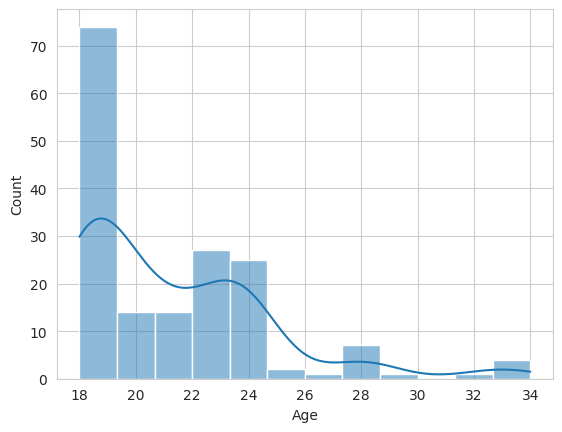

In [422]:
fig = sns.histplot(data, x="Age", kde=True)
fig

Section 2

1. Age vs Depression
2. Study year vs Depression
3. Study year vs Anxiety
4. Students having Depression & Anxiety and them getting treatment(Men vs Women)
5. Study year vs Students getting treatment

In [423]:
# data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})
# data['Depression'] = data['Depression'].replace({'No': 0, 'Yes': 1})
# data['Anxiety'] = data['Anxiety'].replace({'No': 0, 'Yes': 1})

# data['Panic Attack'] = data['Panic Attack'].replace({'No': 0, 'Yes': 1})

# data['Treatment'] = data['Treatment'].replace({'No': 0, 'Yes': 1})

Age vs Depression

In [424]:
data[data['Depression'] == 'Yes'].count()

Date             50
Gender           50
Age              50
Year of Study    50
Depression       50
Anxiety          50
Panic Attack     50
Treatment        50
CGPA             50
dtype: int64

In [425]:
grouped = data.groupby(['Age', 'Depression']).size().reset_index(name='Count')

# Create a grouped bar chart using Plotly Express
fig = px.bar(grouped, x='Age', y='Count', color='Depression', labels={'Count': 'Frequency'},
             title='Relationship Between Age and Depression',
             category_orders={'Depression': [0, 1]})
fig

Study year and students suffering from Depression and Anxiety

In [426]:
depression_data = data[data['Depression'] == 'Yes']
dep = {1 : 0, 2 : 0, 3: 0, 4: 0}
dep[1] = depression_data[depression_data["Year of Study"] == 1].count()[0]
dep[2] = depression_data[depression_data["Year of Study"] == 2].count()[0]
dep[3] = depression_data[depression_data["Year of Study"] == 3].count()[0]
dep[4] = depression_data[depression_data["Year of Study"] == 4].count()[0]
dep

{1: 0, 2: 0, 3: 0, 4: 0}

In [427]:
anxiety_data = data[data['Anxiety'] == 'Yes']
anx = {1 : 0, 2 : 0, 3: 0, 4: 0}
anx[1] = d[d["Year of Study"] == 1].count()[0]
anx[2] = d[d["Year of Study"] == 2].count()[0]
anx[3] = d[d["Year of Study"] == 3].count()[0]
anx[4] = d[d["Year of Study"] == 4].count()[0]
anx

{1: 18, 2: 15, 3: 13, 4: 4}

"Year of Study vs Depression"

In [428]:
fig = px.histogram(data, x="Year of Study" , color="Depression", nbins=4, title= "Year of Study vs Depression")
fig.update_layout(bargap=0.2)


"Year of Study vs Anxiety"

In [429]:
fig = px.histogram(data, x="Year of Study" , color="Anxiety", nbins=4, title="Year of Study vs Anxiety")
fig.update_layout(bargap=0.2)


how many who have Depression and Anxiety and Panic Attacks taking treatment?


In [430]:
data[data["Treatment"] == 'Yes'].count()

Date             14
Gender           14
Age              14
Year of Study    14
Depression       14
Anxiety          14
Panic Attack     14
Treatment        14
CGPA             14
dtype: int64

In [431]:
depression_data[depression_data["Treatment"] == 'Yes'].count()

Date             11
Gender           11
Age              11
Year of Study    11
Depression       11
Anxiety          11
Panic Attack     11
Treatment        11
CGPA             11
dtype: int64

In [432]:
anxiety_data[anxiety_data["Treatment"] == 'Yes'].count()

Date             9
Gender           9
Age              9
Year of Study    9
Depression       9
Anxiety          9
Panic Attack     9
Treatment        9
CGPA             9
dtype: int64

In [433]:
dep_anx = data[(data['Depression'] == 'Yes') & (data['Anxiety'] == 'Yes')]
dep_anx.count()

Date             28
Gender           28
Age              28
Year of Study    28
Depression       28
Anxiety          28
Panic Attack     28
Treatment        28
CGPA             28
dtype: int64

In [434]:
dep_anx_pan = data[(data['Depression'] == 'Yes') & (data['Anxiety'] == 'Yes') & (data['Panic Attack'] == "Yes")]
dep_anx_pan.count()

Date             13
Gender           13
Age              13
Year of Study    13
Depression       13
Anxiety          13
Panic Attack     13
Treatment        13
CGPA             13
dtype: int64

In [435]:
dep_anx[dep_anx["Treatment"] == 'Yes'].count()

Date             6
Gender           6
Age              6
Year of Study    6
Depression       6
Anxiety          6
Panic Attack     6
Treatment        6
CGPA             6
dtype: int64

In [436]:
dep_anx_pan[dep_anx_pan["Treatment"] == "Yes"].count()

Date             2
Gender           2
Age              2
Year of Study    2
Depression       2
Anxiety          2
Panic Attack     2
Treatment        2
CGPA             2
dtype: int64

(Men vs Women) getting Treatment

In [437]:

fig = px.histogram(data, x="Gender", color="Treatment", title="(Men vs Women) getting Treatment")
fig.update_layout(barmode='group')

Who gets more treatment? which year?

Study Year vs Treatment

In [438]:

fig = px.histogram(data, x="Year of Study", color="Treatment", title="Study Year vs Treatment")
fig.update_layout(barmode='group')

**Section 3**



1.   Distribution of CGPA by Gender
2.   Distribution of CGPA by Year of Study
3.   Do people suffering from Depression Score less
4.   Do people suffering from Anxiety Score less
5.   Do students getting treatment more than people who are not
6.   Does Mental issues affect Gender in a different way, and its relation with CGPA

Now analysis about CGPA and its relation with Mental Health

In [439]:
fig = px.histogram(data, x="CGPA", color="Gender",
                   marginal="box", # or violin, rug
                   hover_data=data.columns, title="Distribution of CGPA by Gender")
fig

Distribution of CGPA by Year of Study

In [440]:
fig = px.scatter(data, x="Year of Study", y="CGPA", color="Gender",
                   hover_data=data.columns, title="Distribution of CGPA by Year of Study")
fig

3.   Do people suffering from Depression Score less






In [479]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [442]:
dep_no = data[data["Depression"] == 'No']
dep_no.count()

Date             120
Gender           120
Age              120
Year of Study    120
Depression       120
Anxiety          120
Panic Attack     120
Treatment        120
CGPA             120
dtype: int64

In [443]:
dep_no = data[data["Depression"] == 'No']
dep_no['CGPA'].median()

7.5

In [465]:
depression_data.count()[0]

50

In [466]:
depression_data[depression_data["CGPA"] > 7.5].count()[0]

13

In [446]:
anxiety_data["CGPA"].median()

6.8

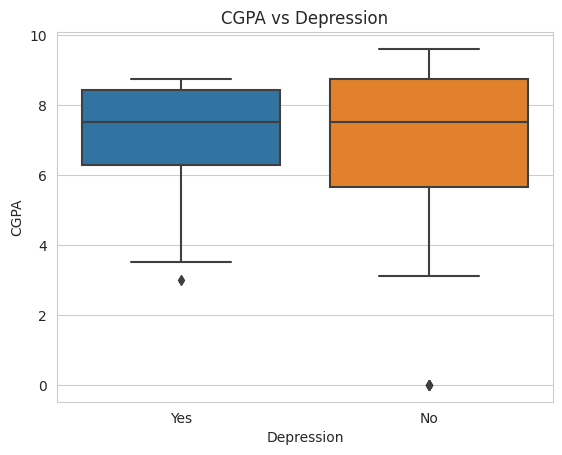

In [447]:
sns.boxplot(x='Depression', y='CGPA', data=data)
plt.title('CGPA vs Depression')
plt.show()

In [448]:
t_stat, p_value = ttest_ind(depression_data["CGPA"], dep_no["CGPA"])

In [500]:
if p_value < 0.05:
    print(f'There is a statistically significant difference in CGPA between depressed and not depressed individuals (p-value: {p_value}).')
else:
    print(f'There is no statistically significant difference in CGPA between depressed and not depressed individuals (p-value: {p_value}).')

There is no statistically significant difference in CGPA between depressed and not depressed individuals (p-value: 0.7383723404465734).


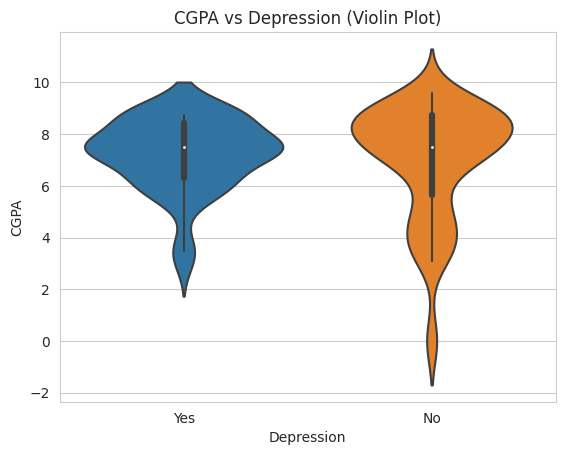

In [450]:
sns.violinplot(x='Depression', y='CGPA', data=data)
plt.title('CGPA vs Depression (Violin Plot)')
plt.show()

3.   Do people suffering from Anxiety Score less




In [458]:
anx_no = data[data["Anxiety"] == "No"]
anx_no.count()[0]

anx_no["CGPA"].median()

7.5

In [459]:
anxiety_data['CGPA'].median()

6.8

In [460]:
anxiety_data.count()

Date             73
Gender           73
Age              73
Year of Study    73
Depression       73
Anxiety          73
Panic Attack     73
Treatment        73
CGPA             73
dtype: int64

In [463]:
t_stat, p_value = ttest_ind(anxiety_data["CGPA"], anx_no["CGPA"])
if p_value < 0.05:
    print(f'There is a statistically significant difference in CGPA between Students suffering from anxiety and Students not suffering from anxiety(p-value: {p_value}).')
else:
    print(f'There is no statistically significant difference in CGPA between the groups (p-value: {p_value}).')

There is a statistically significant difference in CGPA between Students suffering from anxiety and Students not suffering from anxiety(p-value: 5.4222927421191395e-05).


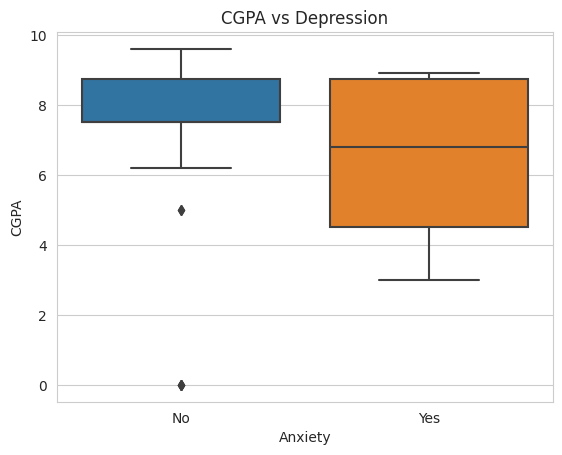

In [464]:
sns.boxplot(x='Anxiety', y='CGPA', data=data)
plt.title('CGPA vs Depression')
plt.show()


Do students getting treatment more than people who are not

In [467]:
depression_and_anxiety_treatment = dep_anx[dep_anx["Treatment"] == "Yes"]
depression_and_anxiety_no_treatment = dep_anx[dep_anx["Treatment"] == "No"]

In [471]:
depression_and_anxiety_treatment.count()[0]

6

In [473]:
depression_and_anxiety_no_treatment.count()[0]

22

In [499]:
t_stat, p_value = ttest_ind(depression_and_anxiety_treatment['CGPA'], depression_and_anxiety_no_treatment['CGPA'])

if p_value < 0.05:
    print(f'There is a statistically significant difference in CGPA between the treatment and no-treatment groups (p-value: {p_value}).')
else:
    print(f'There is no statistically significant difference in CGPA between the treatment and no-treatment groups ( (p-value: {p_value}).')

There is no statistically significant difference in CGPA between the treatment and no-treatment groups ( (p-value: 0.7383723404465734).


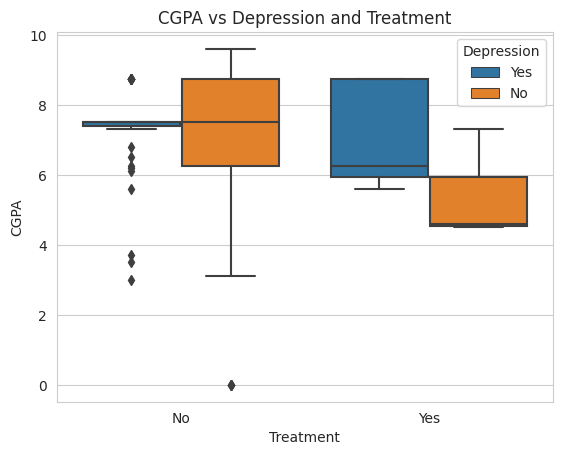

In [498]:
sns.boxplot(x='Treatment', y='CGPA', data=data, hue='Depression')
plt.title('CGPA vs Depression and Treatment')
plt.show()

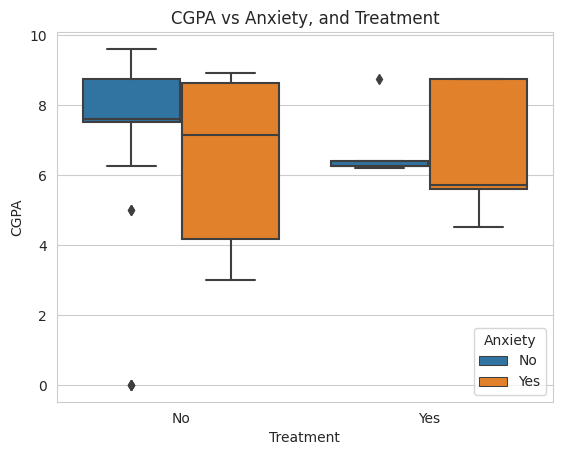

In [497]:
sns.boxplot(x='Treatment', y='CGPA', data=data, hue='Anxiety')
plt.title('CGPA vs Anxiety, and Treatment')
plt.show()

6.   Does Mental issues affect Gender in a different way, and its relation with CGPA

In [481]:
f_stat, p_value = f_oneway(
    depression_data[depression_data['Gender'] == 'Male']['CGPA'],
    depression_data[depression_data['Gender'] == 'Female']['CGPA'],
    dep_no[dep_no['Gender'] == 'Male']['CGPA'],
    dep_no[dep_no['Gender'] == 'Female']['CGPA']
)

if p_value < 0.05:
    print(f'There is a statistically significant difference in CGPA among different groups (p-value: {p_value}).')
else:
    print(f'There is no statistically significant difference in CGPA among different groups (p-value: {p_value}).')







There is a statistically significant difference in CGPA among different groups (p-value: 0.02399196377881738).


In [493]:
depression_data[depression_data["Gender"] == "Male"].count()

Date             7
Gender           7
Age              7
Year of Study    7
Depression       7
Anxiety          7
Panic Attack     7
Treatment        7
CGPA             7
dtype: int64

In [494]:
depression_data[depression_data["Gender"] == "Female"].count()

Date             43
Gender           43
Age              43
Year of Study    43
Depression       43
Anxiety          43
Panic Attack     43
Treatment        43
CGPA             43
dtype: int64

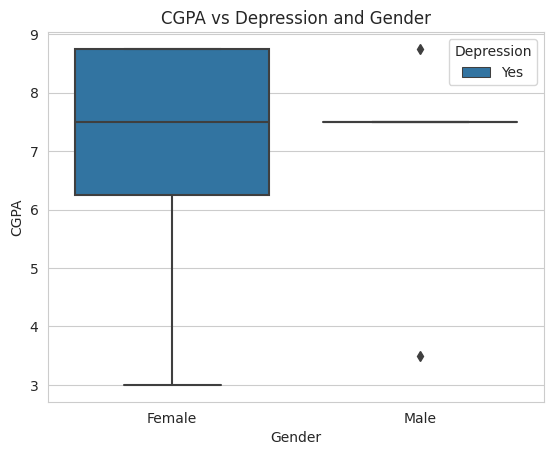

In [491]:
sns.boxplot(x='Gender', y='CGPA', data=depression_data, hue='Depression')
plt.title('CGPA vs Depression and Gender')
plt.show()


In [496]:
depressed_women = data[(data['Depression'] == 'Yes') & (data['Gender'] == 'Female')]
depressed_men = data[(data['Depression'] == 'Yes') & (data['Gender'] == 'Male')]

# Perform a t-test to compare the means of CGPA for depressed women and depressed men
t_stat, p_value = ttest_ind(depressed_women['CGPA'], depressed_men['CGPA'])

if p_value < 0.05:
    print(f'There is a statistically significant difference in CGPA between depressed women and depressed men (p-value: {p_value}).')
else:
    print(f'There is no statistically significant difference in CGPA between depressed women and depressed men (p-value: {p_value}).')

There is no statistically significant difference in CGPA between depressed women and depressed men (p-value: 0.8281599683278501).
